In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

plt.ion()
%matplotlib widget

import matplotlib as ml


In [2]:
current_list = [100, 200, 300, 400, 500] # mA
power_list = [2.46, 8, 13.78, 19.35, 24.55] # mW
time_sep = 100 # ns


mmt = 4

current = current_list[mmt]
power = power_list[mmt]*1e-3 # W

sequence = np.loadtxt(f'Data/Scope data/{current}_100ns_01082024.csv', delimiter=',', skiprows=2)
no_light = np.loadtxt(f'Data/Scope data/N_100ns_01082024.csv', delimiter=',', skiprows=2)

time = sequence[:, 0]*1e9 # ns
total_time_window = time[-1] - time[0]
print(f'Total time: {total_time_window} ns')



Total time: 4.9921880000000005 ns


Background: -0.0001353752154628672
Pulse integrated: 2.27233805511011e-10
CW integrated: 4.112321804679453e-12
CW integrated over 100 ns: 1.8646429384028084e-10
Total: 4.136980993512918e-10


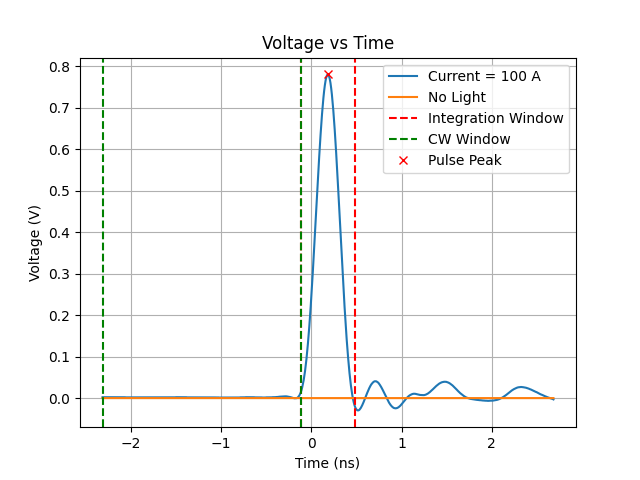

In [3]:
peaks, _ = find_peaks(sequence[:, 1], height=0.07)

time_peak = time[peaks[0]]

integration_window_pulse = 0.3
window_pulse_right = time_peak + integration_window_pulse
window_pulse_left = time_peak - integration_window_pulse

window_CW_right = window_pulse_left
window_CW_left = time[0]
time_CW_window = window_CW_right - window_CW_left
time_CW_total = (time_sep-2*integration_window_pulse)

# Integrate no light
no_light_integrated = np.trapz(no_light[:, 1], no_light[:, 0])
voltage_no_light = np.mean(no_light[:, 1])
print(f'Background: {voltage_no_light}')

# Integrate the pulse
pulse = sequence[(time > window_pulse_left) & (time < window_pulse_right)] - voltage_no_light
pulse_integrated = np.trapz(pulse[:, 1], pulse[:, 0])

# Integrate the CW
CW = sequence[(time > window_CW_left) & (time < window_CW_right)] - voltage_no_light # times 2 because we consider CW on both sides of pulse, but right side has oscillations
CW_integrated = np.trapz(CW[:, 1], CW[:, 0])
CW_integrated_total = (time_CW_total/time_CW_window) * CW_integrated

total = pulse_integrated + CW_integrated_total  # this is the integration of a 100ns window with one pulse and rest CW

print(f'Pulse integrated: {pulse_integrated}')
print(f'CW integrated: {CW_integrated}')
print(f'CW integrated over 100 ns: {CW_integrated_total}')
print(f'Total: {total}')

# Plot data
plt.figure()
plt.plot(time, sequence[:, 1], label='Current = 100 A')
plt.plot(time, no_light[:, 1], label='No Light')
plt.axvline(x=window_pulse_right, color='r', linestyle='--', label='Integration Window')
plt.axvline(x=window_pulse_left, color='r', linestyle='--')
plt.axvline(x=window_CW_right, color='g', linestyle='--', label='CW Window')
plt.axvline(x=window_CW_left, color='g', linestyle='--')
plt.plot(time[peaks[0]], sequence[peaks[0], 1], 'x', color='r', label='Pulse Peak')
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.title('Voltage vs Time')
plt.grid()
plt.show()

In [4]:
# Power estimation

energy_per_ns = power * 1e-9 # mW
energy_in_total_window = time_sep * energy_per_ns 
print(f'Energy in total window: {energy_in_total_window} J')

energy_pulse = (pulse_integrated / total) * energy_in_total_window
energy_CW = (CW_integrated_total / total) * energy_in_total_window 

print(f'Energy in pulse: {energy_pulse*1e12} pJ')
print(f'Energy in CW: {energy_CW*1e12} pJ')

power_CW = energy_CW / time_sep # J/ns
print(f'Power in CW: {1e3*power_CW*1e9} mJ/s (= mW)')

Energy in total window: 2.4550000000000003e-09 J
Energy in pulse: 1348.468831266798 pJ
Energy in CW: 1106.5311687332025 pJ
Power in CW: 11.065311687332027 mJ/s (= mW)


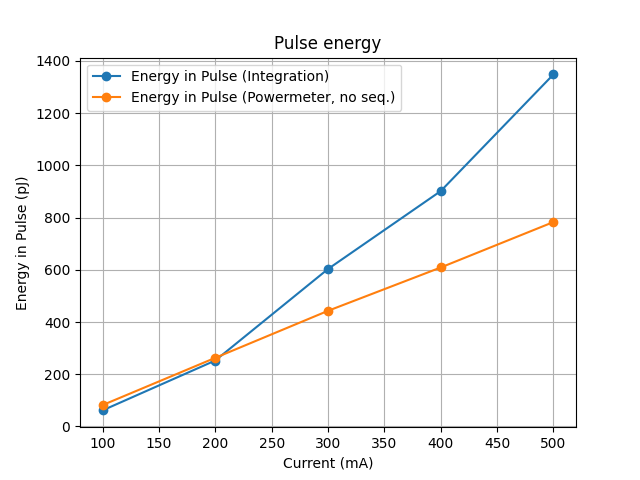

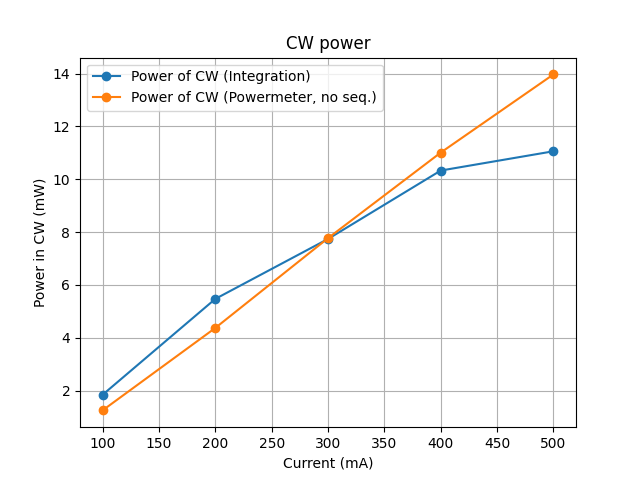

In [5]:

energy_pulse_list = [61.65, 252.72, 603.15, 901.58, 1348.46]
power_CW_list = [1.84, 5.47, 7.74, 10.33, 11.06]

energy_pulse_list_powermeter = [82, 263, 443, 609, 783]
power_CW_list_powermeter = [1.25, 4.37, 7.77, 11.01, 13.97]


plt.figure()
plt.plot(current_list, energy_pulse_list, 'o-', label='Energy in Pulse (Integration)')
plt.plot(current_list, energy_pulse_list_powermeter, 'o-', label='Energy in Pulse (Powermeter, no seq.)')
plt.xlabel('Current (mA)')
plt.ylabel('Energy in Pulse (pJ)')
plt.title('Pulse energy')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(current_list, power_CW_list, 'o-', label='Power of CW (Integration)')
plt.plot(current_list, power_CW_list_powermeter, 'o-', label='Power of CW (Powermeter, no seq.)')
plt.xlabel('Current (mA)')
plt.ylabel('Power in CW (mW)')
plt.title('CW power')
plt.legend()
plt.grid()
plt.show()

In [6]:
ml.use("pgf")
ml.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 12,
    'legend.fontsize': 10,
    'legend.handlelength': 2
})

import pickle
from matplotlib.collections import LineCollection

energy_pulse_list = [61.65, 252.72, 603.15, 901.58, 1348.46]
power_CW_list = [1.84, 5.47, 7.74, 10.33, 11.06]

energy_pulse_list_powermeter = [82, 263, 443, 609, 783]
power_CW_list_powermeter = [1.25, 4.37, 7.77, 11.01, 13.97]


plt.figure()
plt.plot(current_list, energy_pulse_list, 'o-', label='Energy in Pulse (Integration)')
plt.plot(current_list, energy_pulse_list_powermeter, 'o-', label='Energy in Pulse (Powermeter, no seq.)')
plt.xlabel('Current (mA)')
plt.ylabel('Energy in Pulse (pJ)')
plt.title('Pulse energy')
plt.legend()
plt.grid()
plt.show()

ml.pyplot.savefig('pulse_energy.pgf')

plt.figure()
plt.plot(current_list, power_CW_list, 'o-', label='Power of CW (Integration)')
plt.plot(current_list, power_CW_list_powermeter, 'o-', label='Power of CW (Powermeter, no seq.)')
plt.xlabel('Current (mA)')
plt.ylabel('Power in CW (mW)')
plt.title('CW power')
plt.legend()
plt.grid()
plt.show()

ml.pyplot.savefig('CW_power.pgf')

/tmp/ipykernel_59049/2167738801.py:30: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/tmp/ipykernel_59049/2167738801.py:42: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
